## **Exploratory Analysis of Geolocational Data**

Fetch, Clean, Analyse and run K Means Clustering on Geolocational data to recommend accommodations to immigrants to a city!

## Importing Libraries

Importing requried libraries for this project.

In [ ]:
import pandas as pd
from pandas.io.json import json_normalize
import json
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium
import geopy
from sklearn import preprocessing, cluster
import scipy
from geopy.geocoders import Nominatim 
import requests

## Fetching Data

Fetch the Data from the .csv file and convert into Pandas DataFrme.

In [ ]:
df=pd.read_csv("/content/food_coded.csv")
print('Shape of Food Data:', df.shape)
df.head()

Shape of Food Data: (125, 61)


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


## Cleaning and Visualizing the Data

Performing EDA on the given DataFrame and Using differnet visualization techniques to understand the DataFrame/Dataset.

In [ ]:
df.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

In [ ]:
cols=['cook',
        'eating_out',
        'employment',
        'ethnic_food', 
        'exercise','fruit_day',
        'income','on_off_campus',
        'pay_meal_out',
        'sports',
        'veggies_day'
        ]

In [ ]:
clean_df  = df[cols]
clean_df.head()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


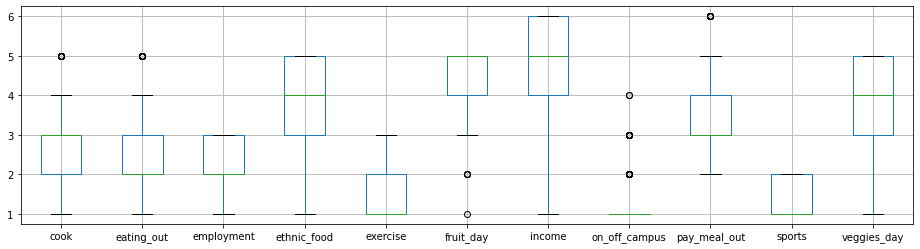

In [ ]:
clean_df.boxplot(figsize = (16, 4))
plt.show()

In [ ]:
clean_df.isnull().sum()

cook              3
eating_out        0
employment        9
ethnic_food       0
exercise         13
fruit_day         0
income            1
on_off_campus     1
pay_meal_out      0
sports            2
veggies_day       0
dtype: int64

In [ ]:
clean_df = clean_df.dropna()
clean_df.isnull().sum()

cook             0
eating_out       0
employment       0
ethnic_food      0
exercise         0
fruit_day        0
income           0
on_off_campus    0
pay_meal_out     0
sports           0
veggies_day      0
dtype: int64

## Performing KMeans Clustering on the data

K Means Clustering will help us group locations based on the amenities located around them.

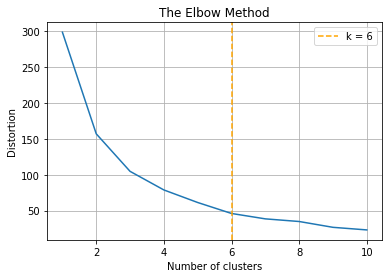

In [ ]:
var=['cook','income']
X = clean_df[var]
max_k = 10

## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)

## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))

## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="orange", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

## Getting Geolocation of the Data

Getting geolocational data from the Foursquare API to find these people some accomodation!

In [ ]:
CLIENT_ID = " " # your Foursquare ID
CLIENT_SECRET = " " # your Foursquare Secret
VERSION = '20200316'
LIMIT = 10000

In [ ]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION,
    18.521428, 73.8544541,
    30000, 
    LIMIT)

In [ ]:
results = requests.get(url).json()
geo_results = json.dumps(results, indent=4)

In [ ]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,...,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.neighborhood
0,e-0-509e80b6e4b04eb23d1ec2e2-0,0,"[{'summary': 'This spot is popular', 'type': '...",509e80b6e4b04eb23d1ec2e2,Le Plaisir,"Shop No. 4B, Lane 6 Intersection, Off Bhandark...","Opp. Kelkar Eye Hospital, Prabhat Road",18.514205,73.838551,"[{'label': 'display', 'lat': 18.51420497479481...",...,IN,Pune,Mahārāshtra,India,"[Shop No. 4B, Lane 6 Intersection, Off Bhandar...","[{'id': '52e81612bcbc57f1066b79f1', 'name': 'B...",0,[],52549645,NaN
1,e-0-4b9b583cf964a520aa0136e3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4b9b583cf964a520aa0136e3,Café GoodLuck,"759/75, GoodLuck Chowk",Corner of FC Road and Bhandarkar Road,18.517388,73.841485,"[{'label': 'display', 'lat': 18.5173883002662,...",...,IN,Pune,Mahārāshtra,India,"[759/75, GoodLuck Chowk (Corner of FC Road and...","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],NaN,NaN
2,e-0-4feebcafe4b0da11fdbe582b-2,0,"[{'summary': 'This spot is popular', 'type': '...",4feebcafe4b0da11fdbe582b,Mad Over Donuts,"Near Sambhaji Park, JM Road",NaN,18.519335,73.845320,"[{'label': 'display', 'lat': 18.51933511140425...",...,IN,Pune,Mahārāshtra,India,"[Near Sambhaji Park, JM Road, Pune 411004, Mah...","[{'id': '4bf58dd8d48988d148941735', 'name': 'D...",0,[],NaN,NaN
3,e-0-4de8acf688774aa92ca43d25-3,0,"[{'summary': 'This spot is popular', 'type': '...",4de8acf688774aa92ca43d25,JW Marriott Hotel Pune,Senapati Bapat Road,NaN,18.532415,73.829773,"[{'label': 'display', 'lat': 18.5324152, 'lng'...",...,IN,Pune,Mahārāshtra,India,"[Senapati Bapat Road, Pune 411053, Mahārāshtra...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],131925835,NaN
4,e-0-4bdd8a57b0f5c928a3874ce3-4,0,"[{'summary': 'This spot is popular', 'type': '...",4bdd8a57b0f5c928a3874ce3,Kiva,"Bhosale Nagar, Near E Square",Range Hills Road,18.538459,73.836863,"[{'label': 'display', 'lat': 18.53845892145780...",...,IN,Pune,Mahārāshtra,India,"[Bhosale Nagar, Near E Square (Range Hills Roa...","[{'id': '4bf58dd8d48988d121941735', 'name': 'L...",0,[],NaN,NaN


### Adding two more cols in 'nearby_venues'

In [ ]:
resta=[]
oth=[]
for lat,long in zip(nearby_venues['venue.location.lat'],nearby_venues['venue.location.lng']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
      CLIENT_ID, 
      CLIENT_SECRET, 
      VERSION, 
      lat,long,
      1000, 
      100)
    res = requests.get(url).json()
    venue = res['response']['groups'][0]['items']
    nearby_venue = json_normalize(venue)
    df=nearby_venue['venue.categories']

    g=[]
    for i in range(0,df.size):
      g.append(df[i][0]['icon']['prefix'].find('food'))
    co=0
    for i in g:
      if i>1:
        co+=1
    resta.append(co)
    oth.append(len(g)-co)

nearby_venues['restaurant']=resta
nearby_venues['others']=oth
nearby_venues

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  del sys.path[0]


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,...,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.neighborhood,restaurant,others
0,e-0-509e80b6e4b04eb23d1ec2e2-0,0,"[{'summary': 'This spot is popular', 'type': '...",509e80b6e4b04eb23d1ec2e2,Le Plaisir,"Shop No. 4B, Lane 6 Intersection, Off Bhandark...","Opp. Kelkar Eye Hospital, Prabhat Road",18.514205,73.838551,"[{'label': 'display', 'lat': 18.51420497479481...",...,Mahārāshtra,India,"[Shop No. 4B, Lane 6 Intersection, Off Bhandar...","[{'id': '52e81612bcbc57f1066b79f1', 'name': 'B...",0,[],52549645,NaN,69,20
1,e-0-4b9b583cf964a520aa0136e3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4b9b583cf964a520aa0136e3,Café GoodLuck,"759/75, GoodLuck Chowk",Corner of FC Road and Bhandarkar Road,18.517388,73.841485,"[{'label': 'display', 'lat': 18.5173883002662,...",...,Mahārāshtra,India,"[759/75, GoodLuck Chowk (Corner of FC Road and...","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],NaN,NaN,84,15
2,e-0-4feebcafe4b0da11fdbe582b-2,0,"[{'summary': 'This spot is popular', 'type': '...",4feebcafe4b0da11fdbe582b,Mad Over Donuts,"Near Sambhaji Park, JM Road",NaN,18.519335,73.845320,"[{'label': 'display', 'lat': 18.51933511140425...",...,Mahārāshtra,India,"[Near Sambhaji Park, JM Road, Pune 411004, Mah...","[{'id': '4bf58dd8d48988d148941735', 'name': 'D...",0,[],NaN,NaN,83,17
3,e-0-4de8acf688774aa92ca43d25-3,0,"[{'summary': 'This spot is popular', 'type': '...",4de8acf688774aa92ca43d25,JW Marriott Hotel Pune,Senapati Bapat Road,NaN,18.532415,73.829773,"[{'label': 'display', 'lat': 18.5324152, 'lng'...",...,Mahārāshtra,India,"[Senapati Bapat Road, Pune 411053, Mahārāshtra...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],131925835,NaN,44,20
4,e-0-4bdd8a57b0f5c928a3874ce3-4,0,"[{'summary': 'This spot is popular', 'type': '...",4bdd8a57b0f5c928a3874ce3,Kiva,"Bhosale Nagar, Near E Square",Range Hills Road,18.538459,73.836863,"[{'label': 'display', 'lat': 18.53845892145780...",...,Mahārāshtra,India,"[Bhosale Nagar, Near E Square (Range Hills Roa...","[{'id': '4bf58dd8d48988d121941735', 'name': 'L...",0,[],NaN,NaN,35,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-4db2df2d6e8179a9135bc3d8-95,0,"[{'summary': 'This spot is popular', 'type': '...",4db2df2d6e8179a9135bc3d8,Taljai Tekadi,Sahakar Nagar,NaN,18.481999,73.847888,"[{'label': 'display', 'lat': 18.48199856638720...",...,Mahārāshtra,India,"[Sahakar Nagar, Pune 411009, Mahārāshtra, India]","[{'id': '4eb1d4d54b900d56c88a45fc', 'name': 'M...",0,[],NaN,NaN,4,1
96,e-0-4bfa8e7b8d30d13a03bd0318-96,0,"[{'summary': 'This spot is popular', 'type': '...",4bfa8e7b8d30d13a03bd0318,Eatmosphere,"Shop No. 24, Ashwini Palace, Next to Kedari Pe...",Wanowrie,18.485444,73.898875,"[{'label': 'display', 'lat': 18.48544384952187...",...,Mahārāshtra,India,"[Shop No. 24, Ashwini Palace, Next to Kedari P...","[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",0,[],NaN,NaN,29,7
97,e-0-4d5941903281b1f7c20bb92f-97,0,"[{'summary': 'This spot is popular', 'type': '...",4d5941903281b1f7c20bb92f,Sen5es,Oakwood Premier,NaN,18.533031,73.910359,"[{'label': 'display', 'lat': 18.53303111691063...",...,Mahārāshtra,India,"[Oakwood Premier, Pune, Mahārāshtra, India]","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],NaN,NaN,22,19
98,e-0-4e1c0067b3adc3746210f7a4-98,0,"[{'summary': 'This spot is popular', 'type': '...",4e1c0067b3adc3746210f7a4,Kangan,"The Westin Pune Koregaon Park, 36/3-B Koregaon...",NaN,18.539616,73.905948,"[{'label': 'display', 'lat': 18.53961573964729...",...,Mahārāshtra,India,"[The Westin Pune Koregaon Park, 36/3-B Koregao...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],NaN,NaN,70,30


In [ ]:
lat=nearby_venues['venue.location.lat']
long=nearby_venues['venue.location.lng']

In [ ]:
pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Plot the clustered locations on a map

Running K Means clustering on the data (finally!) and plot the results on a map.

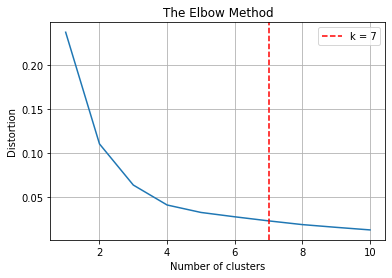

In [ ]:
f=['venue.location.lat','venue.location.lng']
X = nearby_venues[f]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [ ]:
city = "Pune"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, long]:", location)

Pune City, Maharashtra, India
[lat, long]: [18.521428, 73.8544541]


In [ ]:
nearby_venues.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,...,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.neighborhood,restaurant,others
0,e-0-509e80b6e4b04eb23d1ec2e2-0,0,"[{'summary': 'This spot is popular', 'type': '...",509e80b6e4b04eb23d1ec2e2,Le Plaisir,"Shop No. 4B, Lane 6 Intersection, Off Bhandark...","Opp. Kelkar Eye Hospital, Prabhat Road",18.514205,73.838551,"[{'label': 'display', 'lat': 18.51420497479481...",...,Mahārāshtra,India,"[Shop No. 4B, Lane 6 Intersection, Off Bhandar...","[{'id': '52e81612bcbc57f1066b79f1', 'name': 'B...",0,[],52549645,NaN,69,20
1,e-0-4b9b583cf964a520aa0136e3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4b9b583cf964a520aa0136e3,Café GoodLuck,"759/75, GoodLuck Chowk",Corner of FC Road and Bhandarkar Road,18.517388,73.841485,"[{'label': 'display', 'lat': 18.5173883002662,...",...,Mahārāshtra,India,"[759/75, GoodLuck Chowk (Corner of FC Road and...","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],NaN,NaN,84,15
2,e-0-4feebcafe4b0da11fdbe582b-2,0,"[{'summary': 'This spot is popular', 'type': '...",4feebcafe4b0da11fdbe582b,Mad Over Donuts,"Near Sambhaji Park, JM Road",NaN,18.519335,73.845320,"[{'label': 'display', 'lat': 18.51933511140425...",...,Mahārāshtra,India,"[Near Sambhaji Park, JM Road, Pune 411004, Mah...","[{'id': '4bf58dd8d48988d148941735', 'name': 'D...",0,[],NaN,NaN,83,17
3,e-0-4de8acf688774aa92ca43d25-3,0,"[{'summary': 'This spot is popular', 'type': '...",4de8acf688774aa92ca43d25,JW Marriott Hotel Pune,Senapati Bapat Road,NaN,18.532415,73.829773,"[{'label': 'display', 'lat': 18.5324152, 'lng'...",...,Mahārāshtra,India,"[Senapati Bapat Road, Pune 411053, Mahārāshtra...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],131925835,NaN,44,20
4,e-0-4bdd8a57b0f5c928a3874ce3-4,0,"[{'summary': 'This spot is popular', 'type': '...",4bdd8a57b0f5c928a3874ce3,Kiva,"Bhosale Nagar, Near E Square",Range Hills Road,18.538459,73.836863,"[{'label': 'display', 'lat': 18.53845892145780...",...,Mahārāshtra,India,"[Bhosale Nagar, Near E Square (Range Hills Roa...","[{'id': '4bf58dd8d48988d121941735', 'name': 'L...",0,[],NaN,NaN,35,21


In [ ]:
n=nearby_venues.drop(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.cc', 
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.location.crossStreet', 'venue.location.address','venue.location.city',
       'venue.location.state', 'venue.location.crossStreet',
       'venue.location.neighborhood',	'venue.venuePage.id',
       'venue.location.postalCode','venue.location.country'],axis=1)

In [ ]:
n.columns

Index(['venue.location.lat', 'venue.location.lng',
       'venue.location.formattedAddress', 'restaurant', 'others'],
      dtype='object')

In [ ]:
n.head()

,venue.location.lat,venue.location.lng,venue.location.formattedAddress,restaurant,others
0,18.514205,73.838551,"[Shop No. 4B, Lane 6 Intersection, Off Bhandar...",69,20
1,18.517388,73.841485,"[759/75, GoodLuck Chowk (Corner of FC Road and...",84,15
2,18.519335,73.845320,"[Near Sambhaji Park, JM Road, Pune 411004, Mah...",83,17
3,18.532415,73.829773,"[Senapati Bapat Road, Pune 411053, Mahārāshtra...",44,20
4,18.538459,73.836863,"[Bhosale Nagar, Near E Square (Range Hills Roa...",35,21


In [ ]:
n=n.dropna()
n = n.rename(columns={'venue.location.lat': 'lat', 'venue.location.lng': 'long'})
n.head()

,lat,long,venue.location.formattedAddress,restaurant,others
0,18.514205,73.838551,"[Shop No. 4B, Lane 6 Intersection, Off Bhandar...",69,20
1,18.517388,73.841485,"[759/75, GoodLuck Chowk (Corner of FC Road and...",84,15
2,18.519335,73.845320,"[Near Sambhaji Park, JM Road, Pune 411004, Mah...",83,17
3,18.532415,73.829773,"[Senapati Bapat Road, Pune 411053, Mahārāshtra...",44,20
4,18.538459,73.836863,"[Bhosale Nagar, Near E Square (Range Hills Roa...",35,21


In [ ]:
n['venue.location.formattedAddress']

0     [Shop No. 4B, Lane 6 Intersection, Off Bhandar...
1     [759/75, GoodLuck Chowk (Corner of FC Road and...
2     [Near Sambhaji Park, JM Road, Pune 411004, Mah...
3     [Senapati Bapat Road, Pune 411053, Mahārāshtra...
4     [Bhosale Nagar, Near E Square (Range Hills Roa...
                            ...                        
95     [Sahakar Nagar, Pune 411009, Mahārāshtra, India]
96    [Shop No. 24, Ashwini Palace, Next to Kedari P...
97          [Oakwood Premier, Pune, Mahārāshtra, India]
98    [The Westin Pune Koregaon Park, 36/3-B Koregao...
99    [Aditya Towers Opp. Mount Carmel Convent (Lull...
Name: venue.location.formattedAddress, Length: 100, dtype: object

In [ ]:
spec_chars = ["[","]"]
for char in spec_chars:
  n['venue.location.formattedAddress'] = n['venue.location.formattedAddress'].astype(str).str.replace(char, ' ')

n.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,lat,long,venue.location.formattedAddress,restaurant,others
0,18.514205,73.838551,"'Shop No. 4B, Lane 6 Intersection, Off Bhanda...",69,20
1,18.517388,73.841485,"'759/75, GoodLuck Chowk (Corner of FC Road an...",84,15
2,18.519335,73.845320,"'Near Sambhaji Park, JM Road', 'Pune 411004',...",83,17
3,18.532415,73.829773,"'Senapati Bapat Road', 'Pune 411053', 'Mahārā...",44,20
4,18.538459,73.836863,"'Bhosale Nagar, Near E Square (Range Hills Ro...",35,21


In [ ]:
x, y = "lat", "long"
color = "restaurant"
size = "others"
popup = "venue.location.formattedAddress"
data = n.copy()

## create color column
lst_colors=["red","green","orange"]
lst_elements = sorted(list(n[color].unique()))

## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)

## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]],popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend


## plot the map
map_